Peak 1:
  Höhe (a): 460.45827732587253
  Mean (mu): 330.21311474155783
  Standard deviation (sigma): 35.6158287583428
  Background (b): 30.022496407585912

Peak 2:
  Höhe (a): 264.8882896602694
  Mean (mu): 905.773545158889
  Standard deviation (sigma): 78.32292634990999
  Background (b): 23.88501670696486

Peak 3:
  Höhe (a): 79.91370477386663
  Mean (mu): 3904.0569792297847
  Standard deviation (sigma): 151.08806973746536
  Background (b): 17.89702901075096



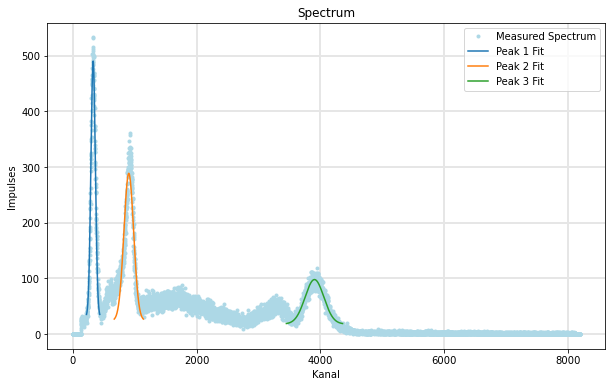

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Function for Gaussian fit
def gaussian(x, a, mu, sigma, b):
    return a * np.exp(-(x - mu)**2 / (2 * sigma**2)) + b

# Load data from text file
data = np.loadtxt('521/spectrum.txt')
x_data = data[:, 0]
y_data = data[:, 1]

# Initial guesses for the parameters of the Gaussian fits
def fit_peak(x, y, initial_guess):
    # Perform curve fitting
    params, _ = curve_fit(gaussian, x, y, p0=initial_guess)
    return params

# Fit parameters for each peak
peak_params = []

# Fit first peak
initial_guess_first_peak = (max(y_data), np.argmax(y_data), 1.0, min(y_data))
params_first_peak = fit_peak(x_data, y_data, initial_guess_first_peak)
peak_params.append(params_first_peak)

# Fit second peak
x_data_second_peak = x_data[(x_data > params_first_peak[1] + 3 * params_first_peak[2]) & (x_data < len(x_data))]
y_data_second_peak = y_data[(x_data > params_first_peak[1] + 3 * params_first_peak[2]) & (x_data < len(y_data))]
initial_guess_second_peak = (max(y_data_second_peak), np.argmax(y_data_second_peak), 1.0, min(y_data_second_peak))
params_second_peak = fit_peak(x_data_second_peak, y_data_second_peak, initial_guess_second_peak)
peak_params.append(params_second_peak)

# Fit third peak
x_data_third_peak = x_data[(x_data > params_second_peak[1] + 3 * params_second_peak[2]) & (x_data < len(x_data))]
y_data_third_peak = y_data[(x_data > params_second_peak[1] + 3 * params_second_peak[2]) & (x_data < len(y_data))]
initial_guess_third_peak = (max(y_data_third_peak), np.argmax(y_data_third_peak) + (params_second_peak[1] + 3 * params_second_peak[2]), 1.0, min(y_data_third_peak))
params_third_peak = fit_peak(x_data_third_peak, y_data_third_peak, initial_guess_third_peak)
peak_params.append(params_third_peak)



# Plotting
plt.figure(figsize=(10, 6))
plt.plot(x_data, y_data, label='Measured Spectrum', color='lightblue', marker='.', linestyle='None')

# Plot individual fits and mark peaks
for i, params in enumerate(peak_params):
    x_fit = np.linspace(params[1] - 3 * params[2], params[1] + 3 * params[2], 1000)
    plt.plot(x_fit, gaussian(x_fit, *params), label=f'Peak {i+1} Fit')

plt.title('Spectrum')
plt.xlabel('Kanal')
plt.ylabel('Impulses')
plt.grid(linestyle='-', color='0.9', linewidth=2)
plt.legend()

# Print fit parameters for each peak
for i, params in enumerate(peak_params):
    a_fit, mu_fit, sigma_fit, b_fit = params
    print(f'Peak {i+1}:')
    print(f'  Höhe (a): {a_fit}')
    print(f'  Mean (mu): {mu_fit}')
    print(f'  Standard deviation (sigma): {sigma_fit}')
    print(f'  Background (b): {b_fit}')
    print()

plt.show()

Peak 1:
  Höhe (a): 15.693540137489316 ± 29.432530273655253
  Mean (mu): 267.7282895924359 ± 8.37330336475653
  Standard deviation (sigma): 5.89439585937988 ± 9.51378179593298

Peak 2:
  Höhe (a): 110.29463730394481 ± 361.5498401171402
  Mean (mu): 292.6288439893343 ± 12.898012561973628
  Standard deviation (sigma): 14.290776329815937 ± 14.206746733187819

Peak 3:
  Höhe (a): 404.2176258841755 ± 278.14313202696303
  Mean (mu): 327.2462167357627 ± 11.18822701531786
  Standard deviation (sigma): 22.509674965877807 ± 26.348605362216052

Peak 4:
  Höhe (a): 138.68041542187765 ± 426.86286813312057
  Mean (mu): 366.9518050536001 ± 50.23199809221804
  Standard deviation (sigma): 20.689968778831787 ± 13.287157313207008

Background parameters:
  b0: 64.49909265802206 ± 1.6172633912115553
  b1: 0.012557262377114188 ± 0.001645376527257906
  b2: -8.224383443432613e-06 ± 4.5767980038166206e-07
  b3: 7.196454406861326e-10 ± 3.6356586965041776e-11



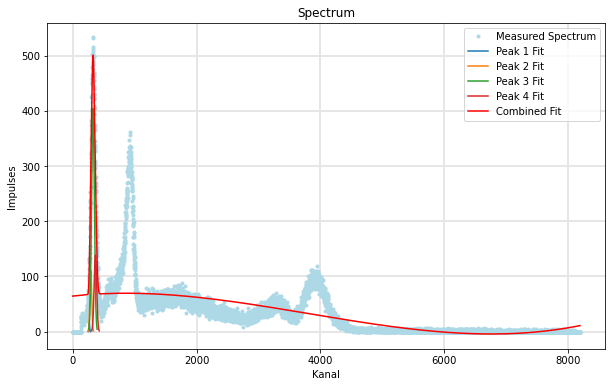

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.signal import find_peaks

def multi_gauss(x, *params):
    n_peaks = (len(params) - 4) // 3
    background = params[-4] + params[-3] * x + params[-2] * x**2 + params[-1] * x**3  
    y = np.zeros_like(x) + background
    for i in range(n_peaks):
        a = params[3*i]
        mu = params[3*i + 1]
        sigma = params[3*i + 2]
        y += a * np.exp(-(x - mu)**2 / (2 * sigma**2))
    return y

def gaussian(x, a, mu, sigma):
    return a * np.exp(-(x - mu)**2 / (2 * sigma**2))

# Load data from text file
data = np.loadtxt('521/spectrum.txt')
x_data = data[:, 0]
y_data = data[:, 1]

# Find peaks
peaks, _ = find_peaks(y_data, height=np.max(y_data)/5, distance=20)
n_peaks = 4
initial_guesses = []

for peak in peaks[:n_peaks]:  # Limit to first `n_peaks` peaks
    initial_guesses.extend([y_data[peak], x_data[peak], 1.0])

# Append initial guesses for polynomial background coefficients
initial_guesses.extend([np.min(y_data), 0, 0, 0])

# Perform curve fitting
params, pcov = curve_fit(multi_gauss, x_data, y_data, p0=initial_guesses)

# Extract fit parameters
fit_params = params[:3*n_peaks]
background_params = params[3*n_peaks:]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(x_data, y_data, label='Measured Spectrum', color='lightblue', marker='.', linestyle='None')

# Plot individual fits
for i in range(n_peaks):
    a, mu, sigma = fit_params[3*i], fit_params[3*i + 1], fit_params[3*i + 2]
    x_fit = np.linspace(mu - 3 * sigma, mu + 3 * sigma, 1000)
    plt.plot(x_fit, gaussian(x_fit, a, mu, sigma), label=f'Peak {i+1} Fit')

# Plot combined fit
plt.plot(x_data, multi_gauss(x_data, *params), label='Combined Fit', color='red')

plt.title('Spectrum')
plt.xlabel('Kanal')
plt.ylabel('Impulses')
plt.grid(linestyle='-', color='0.9', linewidth=2)
plt.legend()

# Print fit parameters for each peak with uncertainties
for i in range(n_peaks):
    a_fit, mu_fit, sigma_fit = fit_params[3*i], fit_params[3*i + 1], fit_params[3*i + 2]
    delta_a_fit, delta_mu_fit, delta_sigma_fit = np.sqrt(np.diag(pcov))[3*i:3*i+3]
    print(f'Peak {i+1}:')
    print(f'  Höhe (a): {a_fit} ± {delta_a_fit}')
    print(f'  Mean (mu): {mu_fit} ± {delta_mu_fit}')
    print(f'  Standard deviation (sigma): {sigma_fit} ± {delta_sigma_fit}')
    print()

# Print background parameters with uncertainties
b_fit, b1_fit, b2_fit, b3_fit = background_params
delta_b_fit, delta_b1_fit, delta_b2_fit, delta_b3_fit = np.sqrt(np.diag(pcov)[-4:])
print(f'Background parameters:')
print(f'  b0: {b_fit} ± {delta_b_fit}')
print(f'  b1: {b1_fit} ± {delta_b1_fit}')
print(f'  b2: {b2_fit} ± {delta_b2_fit}')
print(f'  b3: {b3_fit} ± {delta_b3_fit}')
print()

plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.signal import find_peaks

def gauss(x, sp, sigma, a, offset = 0):
    return a / (sigma * np.sqrt(2 * np.pi)) * np.exp( - ((x - sp)**2)/(sigma**2 *2)) + offset

def off(x,m,b):
    return m*x+b

def quadro_gauss(x, sp_1, sigma_1, a_1, sp_2, sigma_2, a_2, sp_3, sigma_3, a_3, sp_4, sigma_4, a_4, m_2, b_2):
    return gauss(x, sp_1, sigma_1, a_1) + gauss(x, sp_2, sigma_2, a_2) + gauss(x, sp_3, sigma_3, a_3) + gauss(x, sp_4, sigma_4, a_4) + off(x,m_2,b_2)

data = np.loadtxt('521/spectrum.txt')
x_data = data[:, 0]
y_data = data[:, 1]

# x_err = 0.01
# y_err = np.sqrt(data[:,3])

mask = np.logical_and(x_data > 0, x_data < 8000)

#startwerte[sp, sigma, a]
startwerte = [100, 1, 200, 120, 1, 1000, 155 , 1, 500, 180 , 1, 100, -1, 1]
popt, pcov = curve_fit(quadro_gauss, x_data[mask], y_data[mask], p0=startwerte)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(x_data, y_data, label='Measured Spectrum', color='lightblue', marker='.', linestyle='None')

x = np.linspace(np.min(x_data[mask]), np.max(x_data[mask]), 3000)
y = quadro_gauss(x, *popt)
plt.plot(x,y, color="black", label="Anpassungskurve")
plt.errorbar(x_data[mask], y_data[mask],  linestyle = '',color = "red", capsize=3, label = "Daten Nickel (Ni)")
plt.legend(loc="best")
#plt.title("Indium - In ")
plt.grid(True)
plt.ylabel(r"Zählrate in $\frac{1}{\mathrm{s}}$")
plt.xlabel(r"Kanalnummer N")
#plt.savefig(".pdf")
perr = np.sqrt(np.diag(pcov))
popt
print("sp_1, sigma_1, a_1", popt[0], popt[1], popt[2])
print("sp_2, sigma_2, a_2", popt[3], popt[4], popt[5])
print("sp_3, sigma_3, a_3", popt[6], popt[7], popt[8])
print("sp_4, sigma_4, a_4", popt[9], popt[10], popt[11])
print("m_pb, b_pb", popt[12], popt[13])
print("Fehler: sp_1, sigma_1, a_1", perr[0], perr[1], perr[2])
print("Fehler: sp_2, sigma_2, a_2", perr[3], perr[4], perr[5])
print("Fehler: sp_3, sigma_3, a_3", perr[6], perr[7], perr[8])
print("Fehler: sp_4, sigma_4, a_4", perr[9], perr[10], perr[11])
print("Fehler: m_pb, b_pb", perr[12], perr[13])


RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 3000.